### Dependencies

In [162]:
# Visualization Dependencies
from IPython.display import Image, SVG
import seaborn as sns

# Filepaths, Numpy, Tensorflow
import os
import numpy as np
import tensorflow as tf

# Keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

### Import and Shape Data

In [163]:
!pip install emnist

## [EMNIST 說明](https://pypi.org/project/emnist/)
## [資料集 說明](https://www.nist.gov/itl/products-and-services/emnist-dataset)

In [164]:
# pip install emnist
# Import Dataset(s)
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

### 步驟1：載入 MNIST 手寫A~Z資料

In [173]:
# Working with 'letters'
# Import 
#導入使用EMNIST Letters(包含A~Z)26類別的資料
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('letters')
from emnist import extract_test_samples
x_test, y_test = extract_test_samples('letters')

In [174]:
# Check shape of training and testing data
#卻
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(124800, 28, 28)
(124800,)
(20800, 28, 28)
(20800,)


# Plot an image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images_train[1,:,:], cmap=plt.cm.Greys)

In [176]:
y_train = y_train - 1
y_test = y_test - 1

In [177]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=uint8)

In [178]:
class_names = [chr(ord('A')+i) for i in range(26)]
''.join(class_names)

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [180]:
import numpy as np

np.array(class_names)[y_train[0:26]]

array(['W', 'G', 'P', 'O', 'W', 'Q', 'M', 'K', 'V', 'X', 'J', 'N', 'R',
       'U', 'Z', 'U', 'U', 'X', 'S', 'E', 'B', 'Y', 'I', 'E', 'J', 'U'],
      dtype='<U1')

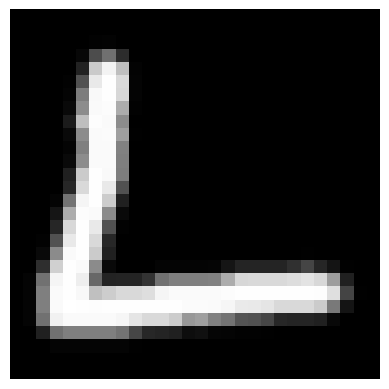

In [181]:
# 顯示第1張圖片圖像
import matplotlib.pyplot as plt

# 第一筆資料
X2 = x_train[47,:,:]

# 繪製點陣圖，cmap='gray':灰階
plt.imshow(X2.reshape(28,28), cmap='gray')

# 隱藏刻度
plt.axis('off') 

# 顯示圖形
plt.show()


In [182]:
y_train[:10]

array([22,  6, 15, 14, 22, 16, 12, 10, 21, 23], dtype=uint8)

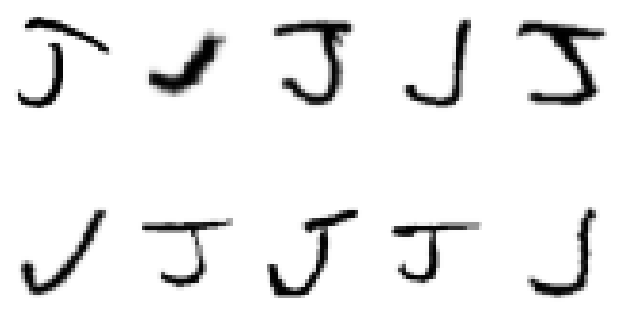

In [183]:
no=9
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == no][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

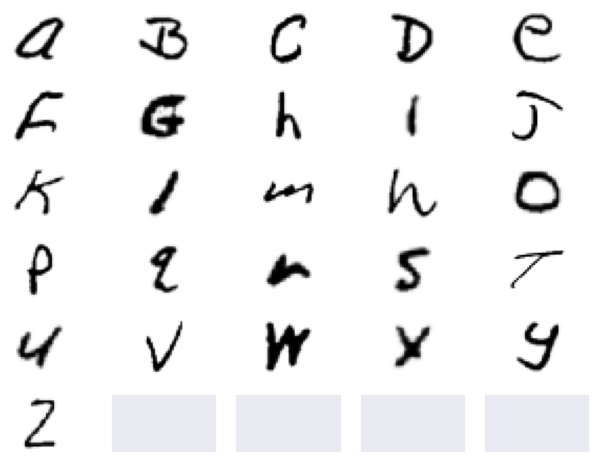

In [185]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(26):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('images/12_5.png', dpi=300)
plt.show()

In [159]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   2,   2,   4,   4,
          4,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,  34,  84, 170, 173, 174, 217, 217,
        217, 203, 129, 114,  38,  21,   4,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  19, 201, 233, 251, 252, 252, 254, 254,
        254, 254, 250, 245, 216, 172, 125,  82,  34,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   8, 207, 253, 254, 254, 254, 254, 254,
        254, 255, 255, 255, 254, 254, 254, 252, 243, 123,  22,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  90, 218, 233, 217, 217, 217, 222,
        249, 250, 250, 252, 254, 254, 255, 254, 254, 232, 126,   2,   0,
          0,   0],
       [  

## 步驟2：資料清理，此步驟無需進行

## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [186]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255


# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843137, 0.42745098,
        0.44705882, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [187]:
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.01176471,
        0.01568627, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.07843137, 0.42745098,
        0.44705882, 0.17647059, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    



## 步驟4：資料分割，此步驟無需進行，載入MNIST資料時，已經切割好了

## 步驟5：建立模型結構

In [188]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 建立模型
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=26, activation='softmax')
])


In [189]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [190]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 1600)              0         
                                                                 
 dense_26 (Dense)            (None, 64)              

## 步驟6：結合訓練資料及模型，進行模型訓練

In [192]:
# 模型訓練
# callback: https://ithelp.ithome.com.tw/articles/10234641
# 自訂 callback: https://ithelp.ithome.com.tw/articles/10235293
history = model.fit(x_train_norm, y_train, epochs=100, batch_size=1000, validation_split=0.2)

Epoch 1/100
100/100 [==============================] - 26s 257ms/step - loss: 0.4798 - accuracy: 0.8471 - val_loss: 0.2732 - val_accuracy: 0.9131
Epoch 2/100
100/100 [==============================] - 27s 265ms/step - loss: 0.4674 - accuracy: 0.8502 - val_loss: 0.2629 - val_accuracy: 0.9152
Epoch 3/100
100/100 [==============================] - 27s 267ms/step - loss: 0.4489 - accuracy: 0.8569 - val_loss: 0.2606 - val_accuracy: 0.9175
Epoch 4/100
100/100 [==============================] - 28s 277ms/step - loss: 0.4396 - accuracy: 0.8593 - val_loss: 0.2598 - val_accuracy: 0.9167
Epoch 5/100
100/100 [==============================] - 28s 281ms/step - loss: 0.4290 - accuracy: 0.8629 - val_loss: 0.2518 - val_accuracy: 0.9192
Epoch 6/100
100/100 [==============================] - 28s 283ms/step - loss: 0.4210 - accuracy: 0.8656 - val_loss: 0.2459 - val_accuracy: 0.9212
Epoch 7/100
100/100 [==============================] - 28s 282ms/step - loss: 0.4106 - accuracy: 0.8686 - val_loss: 0.2436 -

Epoch 57/100
100/100 [==============================] - 26s 263ms/step - loss: 0.2326 - accuracy: 0.9189 - val_loss: 0.2146 - val_accuracy: 0.9358
Epoch 58/100
100/100 [==============================] - 26s 263ms/step - loss: 0.2289 - accuracy: 0.9192 - val_loss: 0.2171 - val_accuracy: 0.9346
Epoch 59/100
100/100 [==============================] - 27s 268ms/step - loss: 0.2284 - accuracy: 0.9191 - val_loss: 0.2148 - val_accuracy: 0.9357
Epoch 60/100
100/100 [==============================] - 27s 271ms/step - loss: 0.2256 - accuracy: 0.9209 - val_loss: 0.2118 - val_accuracy: 0.9354
Epoch 61/100
100/100 [==============================] - 27s 271ms/step - loss: 0.2229 - accuracy: 0.9211 - val_loss: 0.2146 - val_accuracy: 0.9367
Epoch 62/100
100/100 [==============================] - 28s 277ms/step - loss: 0.2259 - accuracy: 0.9203 - val_loss: 0.2185 - val_accuracy: 0.9353
Epoch 63/100
100/100 [==============================] - 27s 270ms/step - loss: 0.2256 - accuracy: 0.9197 - val_loss: 0

In [193]:
# 檢查 history 所有鍵值
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

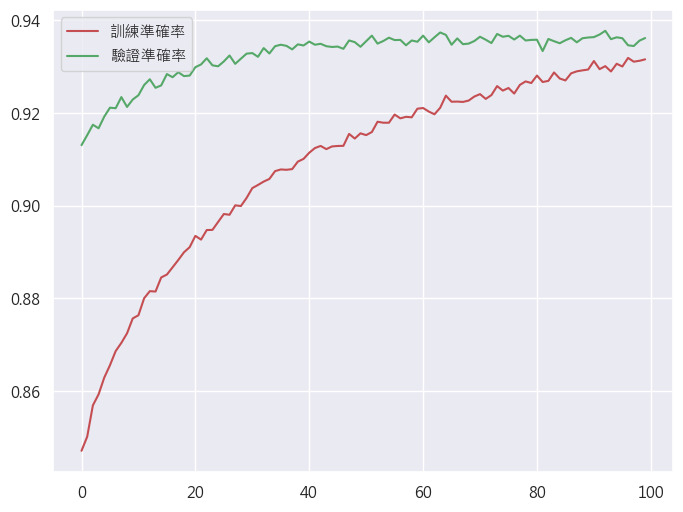

In [194]:
# 對訓練過程的準確率繪圖
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], 'r', label='訓練準確率')
plt.plot(history.history['val_accuracy'], 'g', label='驗證準確率')
plt.legend()

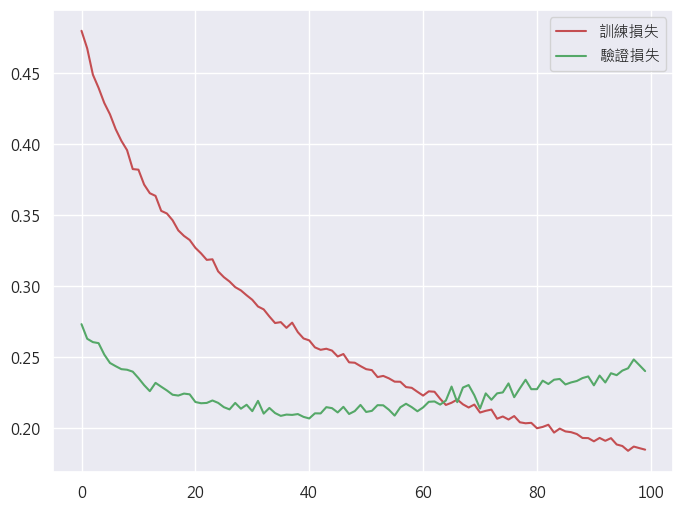

In [195]:
# 對訓練過程的損失繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], 'r', label='訓練損失')
plt.plot(history.history['val_loss'], 'g', label='驗證損失')
plt.legend()

## 步驟7：評分(Score Model)

In [196]:
# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

loss: 0.2576
accuracy: 0.9321


In [198]:
# 實際預測 20 筆資料
# predictions = model.predict_classes(x_test_norm)
import numpy as np
predictions = np.argmax(model.predict(x_test_norm), axis=-1)

# 比對
print('actual    :', y_test[0:20])
print('prediction:', predictions[0:20])

650/650 [==============================] - 2s 3ms/step
actual    : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
prediction: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [199]:
# 顯示第 9 筆的機率
import numpy as np

predictions = model.predict(x_test_norm[8:9])
print(f'0~9預測機率: {np.around(predictions, 2)}')

1/1 [==============================] - 0s 47ms/step
0~9預測機率: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.]]


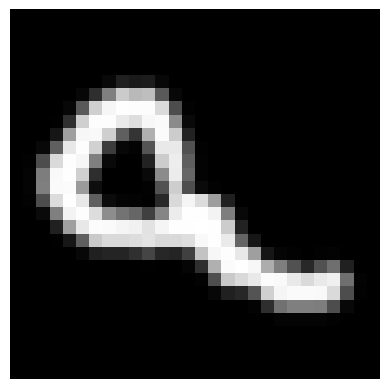

In [200]:
# 顯示第 9 筆圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show() 

## 步驟9：模型佈署

In [201]:
# 模型存檔
model.save('model.h5')
# model.save('my_model.keras')

# 模型載入
# model = tf.keras.models.load_model('model.h5')
# model = tf.keras.models.load_model('my_model.keras')